In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URl for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1

# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 5o for logging purposes.
    if (i %  50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | novikovo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | marsa matruh
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | luena
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | sentyabrskiy
Ci

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,76.91,65,0,3.44,RE,2022-06-16 06:31:21
1,Novikovo,51.1537,37.8879,65.73,61,97,6.62,RU,2022-06-16 06:31:22
2,Ushuaia,-54.8000,-68.3000,44.26,57,40,12.66,AR,2022-06-16 06:31:22
3,Mahebourg,-20.4081,57.7000,78.26,61,40,13.80,MU,2022-06-16 06:27:30
4,Tuktoyaktuk,69.4541,-133.0374,39.51,72,0,11.27,CA,2022-06-16 06:31:22
5,Marsa Matruh,31.3525,27.2453,77.76,60,0,7.74,EG,2022-06-16 06:31:23
6,Avarua,-21.2078,-159.7750,75.25,83,16,3.44,CK,2022-06-16 06:31:23
7,Bluff,-46.6000,168.3333,45.81,68,65,18.32,NZ,2022-06-16 06:31:23
8,Natal,-5.7950,-35.2094,73.62,94,20,5.75,BR,2022-06-16 06:31:24
9,Bengkulu,-3.8004,102.2655,83.16,71,100,6.40,ID,2022-06-16 06:31:24


In [11]:
# Reordering the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2022-06-16 06:31:21,-21.3393,55.4781,76.91,65,0,3.44
1,Novikovo,RU,2022-06-16 06:31:22,51.1537,37.8879,65.73,61,97,6.62
2,Ushuaia,AR,2022-06-16 06:31:22,-54.8000,-68.3000,44.26,57,40,12.66
3,Mahebourg,MU,2022-06-16 06:27:30,-20.4081,57.7000,78.26,61,40,13.80
4,Tuktoyaktuk,CA,2022-06-16 06:31:22,69.4541,-133.0374,39.51,72,0,11.27
5,Marsa Matruh,EG,2022-06-16 06:31:23,31.3525,27.2453,77.76,60,0,7.74
6,Avarua,CK,2022-06-16 06:31:23,-21.2078,-159.7750,75.25,83,16,3.44
7,Bluff,NZ,2022-06-16 06:31:23,-46.6000,168.3333,45.81,68,65,18.32
8,Natal,BR,2022-06-16 06:31:24,-5.7950,-35.2094,73.62,94,20,5.75
9,Bengkulu,ID,2022-06-16 06:31:24,-3.8004,102.2655,83.16,71,100,6.40


In [12]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655361965.7416565

In [15]:
today = time.strftime("%x")
today

'06/16/22'

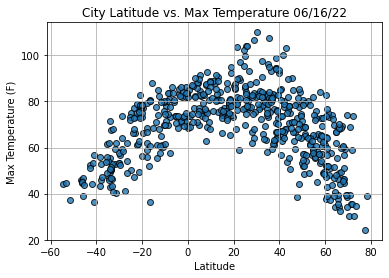

In [16]:
# Import time module
import time

# Add Dependencies
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

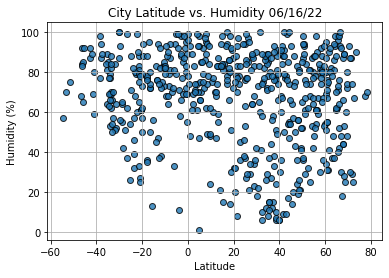

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

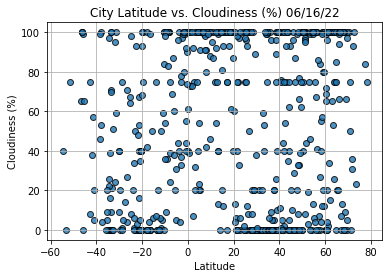

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

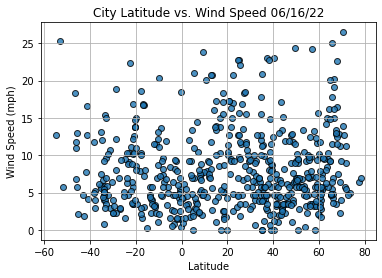

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()